In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

titanic= sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
survival_rate= (titanic['survived'] == 1).mean()
print(survival_rate)

0.3838383838383838


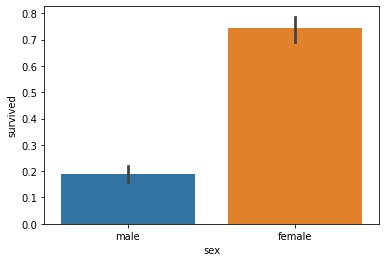

In [3]:
sns.barplot(x="sex", y="survived", data=titanic)
plt.show()

<AxesSubplot:title={'center':'Survival Status Count by Gender'}, xlabel='Gender', ylabel='Counts'>

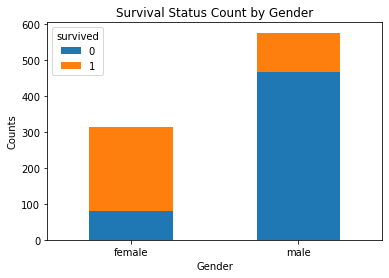

In [50]:
df=titanic[['sex','survived']]
dfp = df.pivot_table(index='sex', columns=['survived'], aggfunc=len)

dfp.plot(kind='bar', stacked=True, ylabel='Counts', xlabel='Gender',
         title='Survival Status Count by Gender', rot=0)

In [5]:
survival_rate_sex= titanic.groupby("sex")["survived"].mean()
print(survival_rate_sex * 100)

sex
female    74.203822
male      18.890815
Name: survived, dtype: float64


pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


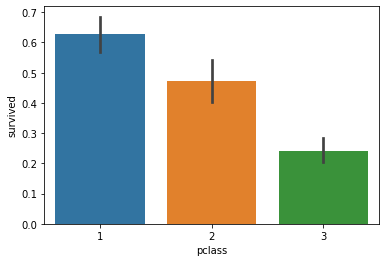

In [11]:
rate_by_class= titanic.groupby('pclass')["survived"].mean()
print(rate_by_class)

sns.barplot(x="pclass", y="survived", data=titanic)
plt.show()

age
36.0    0.500000
36.5    0.000000
37.0    0.166667
38.0    0.454545
39.0    0.357143
40.0    0.461538
40.5    0.000000
41.0    0.333333
42.0    0.461538
43.0    0.200000
44.0    0.333333
45.0    0.416667
45.5    0.000000
46.0    0.000000
47.0    0.111111
48.0    0.666667
49.0    0.666667
Name: survived, dtype: float64


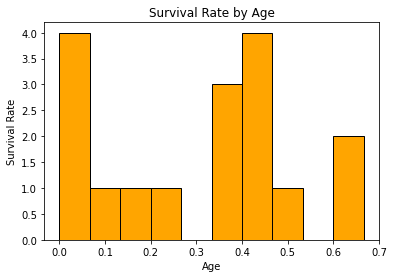

In [52]:
rate_by_age= titanic[(titanic["age"] > 35) & (titanic["age"]< 50)] 
new_rate= rate_by_age.groupby('age')['survived'].mean()
print(new_rate)

plt.hist(new_rate, bins=10, facecolor="orange", edgecolor="black")
plt.title("Survival Rate by Age")
plt.xlabel("Age")
plt.ylabel("Survival Rate")
plt.show()

# sns.barplot(x="age", y="survived", data=titanic)
# plt.show()

class   who  
First   child    0.833333
        man      0.352941
        woman    0.978022
Second  child    1.000000
        man      0.080808
        woman    0.909091
Third   child    0.431034
        man      0.119122
        woman    0.491228
Name: survived, dtype: float64


<AxesSubplot:xlabel='class', ylabel='survived'>

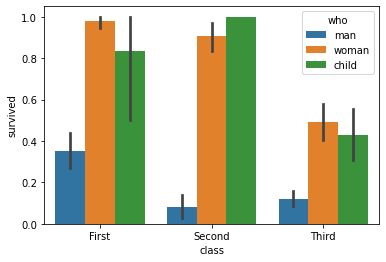

In [51]:
rate_by_ticket_gender= titanic.groupby(['class','who'])['survived'].mean()
print(rate_by_ticket_gender)
sns.barplot(x="class", y="survived", hue="who", data=titanic)

In [56]:
rate_by_ticket_gender_class_age= titanic.groupby(['age','who','class'])['survived'].mean()
print(rate_by_ticket_gender_class_age)

age    who    class 
0.42   child  First     NaN
              Second    NaN
              Third     1.0
       man    First     NaN
              Second    NaN
                       ... 
80.00  man    Second    NaN
              Third     NaN
       woman  First     NaN
              Second    NaN
              Third     NaN
Name: survived, Length: 792, dtype: float64


In [15]:
rate_by_embarked= titanic.groupby('embarked')['survived'].mean()
print(rate_by_embarked)

embarked
C    0.553571
Q    0.389610
S    0.336957
Name: survived, dtype: float64


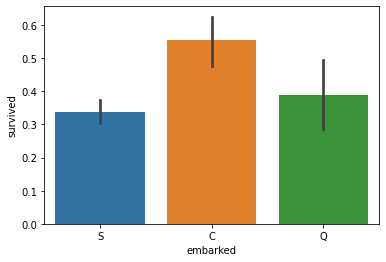

In [39]:
sns.barplot(x="embarked", y="survived", data=titanic)
plt.show()